
# Lab 9.3: Working with Pre-trained Word Embeddings — Word2Vec / GloVe  

---
## Objective
To understand and explore pre-trained word embeddings (Word2Vec / GloVe), compute similarity, nearest neighbors, analogies, visualize embeddings, and prepare reflections based on results.



---
## STEP 2 — Import Required Libraries



In [3]:
# STEP 2: Import required libraries

!pip install gensim
import gensim.downloader as api   # for downloading pre-trained Word2Vec models
import numpy as np                # for numerical computations
import pandas as pd               # for storing similarity results in table form
import nltk                       # for NLP utilities
import matplotlib.pyplot as plt   # for visualization

from sklearn.decomposition import PCA   # dimensionality reduction
from sklearn.manifold import TSNE       # better visualization in 2D

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True


---
## STEP 3 — Load Pre-trained Embeddings

**pre-trained Word2Vec model** from gensim.  
we use **Google News Word2Vec

### Explanation:
Pre-trained embedding models are trained on large text corpora.  
Each word is represented as a dense numeric vector (e.g., 100 or 300 dimensions).  


In [4]:

# STEP 3: Load pre-trained embeddings

# Recommended model (smaller, loads faster):
model = api.load("glove-wiki-gigaword-100")   # 100-dimensional GloVe embeddings

# Print vocabulary size
print("Vocabulary size:", len(model.key_to_index))

# Display example word vectors
print("\nVector for word 'king':")
print(model['king'])

print("\nVector shape:", model['king'].shape)


[==================================================] 100.0% 128.1/128.1MB downloaded
Vocabulary size: 400000

Vector for word 'king':
[-0.32307  -0.87616   0.21977   0.25268   0.22976   0.7388   -0.37954
 -0.35307  -0.84369  -1.1113   -0.30266   0.33178  -0.25113   0.30448
 -0.077491 -0.89815   0.092496 -1.1407   -0.58324   0.66869  -0.23122
 -0.95855   0.28262  -0.078848  0.75315   0.26584   0.3422   -0.33949
  0.95608   0.065641  0.45747   0.39835   0.57965   0.39267  -0.21851
  0.58795  -0.55999   0.63368  -0.043983 -0.68731  -0.37841   0.38026
  0.61641  -0.88269  -0.12346  -0.37928  -0.38318   0.23868   0.6685
 -0.43321  -0.11065   0.081723  1.1569    0.78958  -0.21223  -2.3211
 -0.67806   0.44561   0.65707   0.1045    0.46217   0.19912   0.25802
  0.057194  0.53443  -0.43133  -0.34311   0.59789  -0.58417   0.068995
  0.23944  -0.85181   0.30379  -0.34177  -0.25746  -0.031101 -0.16285
  0.45169  -0.91627   0.64521   0.73281  -0.22752   0.30226   0.044801
 -0.83741   0.55006  -0.52


### Explanation of vector values:
Each number in the vector represents one learned feature dimension.These dimensions do not directly correspond to human-readable meanings.Instead, they capture hidden semantic and syntactic patterns from training data.  




---
## STEP 4 — Explore Word Similarity



In [6]:
# STEP 4: Compute similarity for at least 10 word pairs

word_pairs = [
    ("doctor", "nurse"),
    ("cat", "dog"),
    ("car", "bus"),
    ("king", "queen"),
    ("man", "woman"),
    ("apple", "banana"),
    ("computer", "laptop"),
    ("india", "china"),
    ("football", "cricket"),
    ("teacher", "student")
]

results = []
for w1, w2 in word_pairs:
    sim = model.similarity(w1, w2)
    results.append((w1, w2, sim))

df_similarity = pd.DataFrame(results, columns=["Word1", "Word2", "Cosine Similarity"])
df_similarity


,Word1,Word2,Cosine Similarity
0,doctor,nurse,0.752151
1,cat,dog,0.879807
2,car,bus,0.737271
3,king,queen,0.750769
4,man,woman,0.832349
5,apple,banana,0.505447
6,computer,laptop,0.702416
7,india,china,0.599711
8,football,cricket,0.665964
9,teacher,student,0.808340



### Interpretation:
- Similarity close to **1.0** means the words are strongly related.
- Similarity close to **0** means weak relationship.
- Negative similarity indicates opposite or unrelated meanings.



---
## STEP 5 — Nearest Neighbor Exploration


In [7]:
# STEP 5: Nearest neighbors

chosen_words = ["king", "university", "doctor", "computer", "india"]

for word in chosen_words:
    print("\nTop 10 nearest neighbors for:", word)
    print(model.most_similar(word, topn=10))



Top 10 nearest neighbors for: king
[('prince', 0.7682328820228577), ('queen', 0.7507690787315369), ('son', 0.7020888328552246), ('brother', 0.6985775232315063), ('monarch', 0.6977890729904175), ('throne', 0.6919989585876465), ('kingdom', 0.6811409592628479), ('father', 0.6802029013633728), ('emperor', 0.6712858080863953), ('ii', 0.6676074266433716)]

Top 10 nearest neighbors for: university
[('college', 0.8294212818145752), ('harvard', 0.8156033754348755), ('yale', 0.8113803267478943), ('professor', 0.8103784918785095), ('graduate', 0.7993000745773315), ('faculty', 0.7793422341346741), ('princeton', 0.762718141078949), ('institute', 0.7604438662528992), ('school', 0.7548453211784363), ('stanford', 0.7424825429916382)]

Top 10 nearest neighbors for: doctor
[('physician', 0.7673240303993225), ('nurse', 0.75215083360672), ('dr.', 0.7175194025039673), ('doctors', 0.7080884575843811), ('patient', 0.7074184417724609), ('medical', 0.6995992660522461), ('surgeon', 0.6905338168144226), ('hospi


### Interpretation:
- Words near **king** relate to royalty.
- Words near **university** relate to education and institutions.
- Words near **doctor** relate to medicine and healthcare.
- Words near **computer** relate to technology.
- Words near **india** relate to countries and geography.



---
## STEP 6 — Word Analogy Tasks


In [8]:
# STEP 6: Analogy queries

analogies = [
    ("king", "man", "woman"),
    ("paris", "france", "india"),
    ("teacher", "school", "hospital")
]

for a, b, c in analogies:
    print(f"\nAnalogy: {a} - {b} + {c} = ?")
    print(model.most_similar(positive=[a, c], negative=[b], topn=5))



Analogy: king - man + woman = ?
[('queen', 0.7698540687561035), ('monarch', 0.6843381524085999), ('throne', 0.6755736470222473), ('daughter', 0.6594556570053101), ('princess', 0.6520534157752991)]

Analogy: paris - france + india = ?
[('delhi', 0.8654932975769043), ('mumbai', 0.7718895077705383), ('bombay', 0.7222235798835754), ('dhaka', 0.6891742944717407), ('calcutta', 0.6761991381645203)]

Analogy: teacher - school + hospital = ?
[('nurse', 0.7798740267753601), ('doctor', 0.76134192943573), ('patient', 0.6908571124076843), ('physician', 0.6851393580436707), ('hospitalized', 0.6718847751617432)]



### Explanation:
Embeddings solve analogies because relationships like gender or country-capital form consistent vector directions.Vector arithmetic captures these semantic offsets.



---
## STEP 7 — Visualization (Optional)


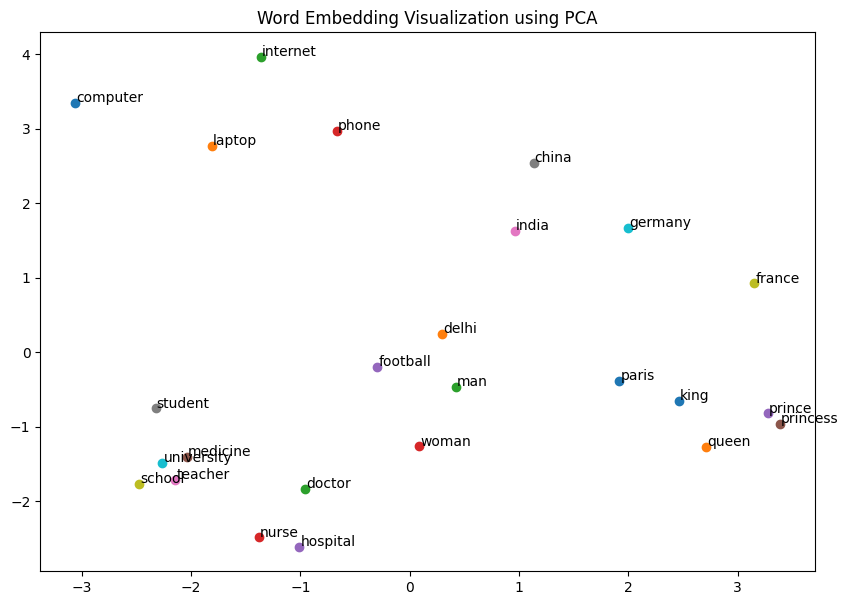

In [9]:
# STEP 7: Visualization using PCA + TSNE

words = [
    "king", "queen", "man", "woman", "prince", "princess",
    "india", "china", "france", "germany", "paris", "delhi",
    "doctor", "nurse", "hospital", "medicine", "teacher", "student",
    "school", "university", "computer", "laptop", "internet", "phone",
    "football"
]

vectors = np.array([model[word] for word in words])

# Reduce dimensions to 2 using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

plt.figure(figsize=(10, 7))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(reduced_vectors[i, 0] + 0.01, reduced_vectors[i, 1] + 0.01, word)

plt.title("Word Embedding Visualization using PCA")
plt.show()



### Interpretation:
Words with similar meaning appear closer in the plot.Clusters like countries, royalty terms, and education-related words may appear grouped.
